In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
from matplotlib import style

In [3]:
ess_de = pd.read_csv("ESS_R8_Germany.csv")

# PRE-PROCESSING

In [4]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [5]:
import warnings
warnings.simplefilter(action='ignore')

In [6]:
# No answer lists

no_answer_1 = [7,8,9]
no_answer_2 = [77,88,99]
no_answer_3 = [55,77,88,99]
no_answer_4 = [7777,8888,9999]
no_answer_5 = [6,7,8,9]
no_answer_6 = [3,7,8,9]



1 - nwspol



In [7]:
raw_nwspol = ess_de["nwspol"]


In [8]:
raw_nwspol = raw_nwspol[raw_nwspol.isin(no_answer_4)==False]

In [9]:
raw_nwspol.head()

0      3
1     30
2     60
3     15
4    150
Name: nwspol, dtype: int64

In [12]:
ess_de.insert(1, "raw_nwspol",raw_nwspol, True)

In [13]:
#News about politics variable is negatively skewed. Since filling the null values with mean would give a biased
# result, the median value fill in the missing values. 

ess_de["raw_nwspol"].fillna(ess_de["raw_nwspol"].median(skipna=True), inplace=True)

In [14]:
ess_de["raw_nwspol"].count()

2852

2 - polintr

In [15]:
raw_polintr = ess_de["polintr"]

In [16]:
raw_polintr = raw_polintr[raw_polintr.isin(no_answer_1)==False]

In [17]:
ess_de.insert(2, "raw_polintr",raw_polintr, True)

In [18]:
ess_de.raw_polintr.isnull().sum()

1

In [19]:
# Only 1 missing value will not bias the result. It will be filled with the median. 

ess_de["raw_polintr"].fillna(ess_de["raw_polintr"].median(skipna=True), inplace=True)

In [20]:
ess_de.raw_polintr.isnull().sum()

0

In [21]:
# Changing the values to binominal: Interested(1) or Not Interested(0)

ess_de.loc[(ess_de.raw_polintr == 1),'raw_polintr'] = 1
ess_de.loc[(ess_de.raw_polintr == 2),'raw_polintr'] = 1
ess_de.loc[(ess_de.raw_polintr == 3),'raw_polintr'] = 0
ess_de.loc[(ess_de.raw_polintr == 4),'raw_polintr'] = 0

Political Interes: 1-Interested 0-Not Interested
1.0    1942
0.0     910
Name: raw_polintr, dtype: int64


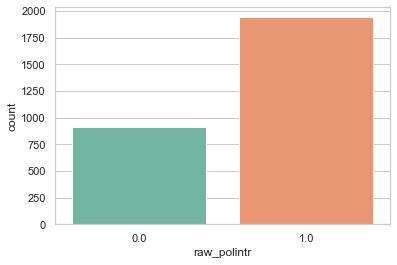

In [22]:
print('Political Interes: 1-Interested 0-Not Interested')
print(ess_de['raw_polintr'].value_counts())
sns.countplot(x='raw_polintr', data=ess_de, palette='Set2')
plt.show()

In [23]:
ess_de["raw_polintr"].count()

2852

3-vote

In [24]:
raw_vote = ess_de["vote"]

In [25]:
raw_vote = raw_vote[raw_vote.isin([3,7,8,9])==False]

In [26]:
ess_de.insert(3, "raw_vote",raw_vote, True)

In [27]:
ess_de.raw_vote.isnull().sum()

367

Voted in the Last National Election
1.0    2114
2.0     371
Name: raw_vote, dtype: int64


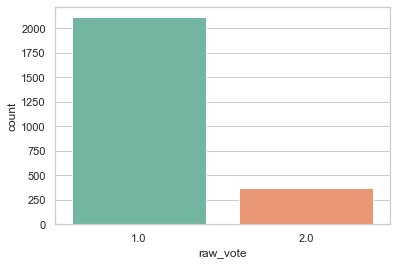

In [28]:
print('Voted in the Last National Election')
print(ess_de['raw_vote'].value_counts())
sns.countplot(x='raw_vote', data=ess_de, palette='Set2')
plt.show()

In [29]:
#Assigned half of the values to vote, the other half to not voted.

ess_de["raw_vote"].fillna(0, inplace=True, limit=183)

In [30]:
ess_de["raw_vote"].fillna(1, inplace=True)

In [31]:
ess_de.raw_vote.isnull().sum()

0

Voted in the Last National Election
1.0    2298
2.0     371
0.0     183
Name: raw_vote, dtype: int64


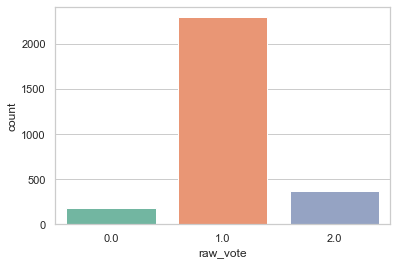

In [32]:
print('Voted in the Last National Election')
print(ess_de['raw_vote'].value_counts())
sns.countplot(x='raw_vote', data=ess_de, palette='Set2')
plt.show()

In [33]:
#Making vote into a binominal: 0-not voted 1-voted

ess_de.loc[(ess_de.raw_vote == 2),'raw_vote'] = 0

Voted in the Last National Election
1.0    2298
0.0     554
Name: raw_vote, dtype: int64


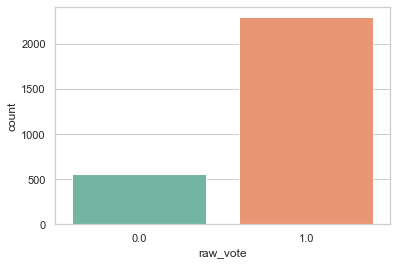

In [34]:
print('Voted in the Last National Election')
print(ess_de['raw_vote'].value_counts())
sns.countplot(x='raw_vote', data=ess_de, palette='Set2')
plt.show()

4-sgnptit

In [35]:
raw_sgnptit = ess_de["sgnptit"]

In [36]:
raw_sgnptit = raw_sgnptit[raw_sgnptit.isin(no_answer_1)==False]

In [37]:
ess_de.insert(4, "raw_sgnptit",raw_sgnptit, True)

In [38]:
ess_de.raw_sgnptit.isnull().sum()

7

In [39]:
ess_de["raw_sgnptit"].fillna(0, inplace=True, limit=4)

In [40]:
ess_de["raw_sgnptit"].fillna(1, inplace=True)

In [41]:
ess_de.raw_sgnptit.isnull().sum()

0

In [42]:
#Making vote into a binominal: 0-not signed 1-signed

ess_de.loc[(ess_de.raw_sgnptit == 2),'raw_sgnptit'] = 0

Signed petition last 12 months: 0-No 1-Yes
0.0    1776
1.0    1076
Name: raw_sgnptit, dtype: int64


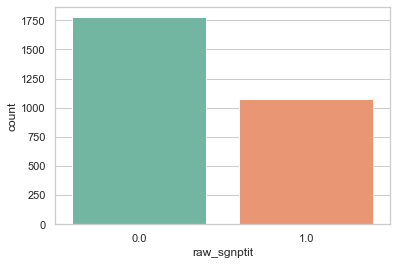

In [43]:
print('Signed petition last 12 months: 0-No 1-Yes')
print(ess_de['raw_sgnptit'].value_counts())
sns.countplot(x='raw_sgnptit', data=ess_de, palette='Set2')
plt.show()

5 - pstplonl

Missing Value Check
2    2217
1     633
8       2
Name: pstplonl, dtype: int64


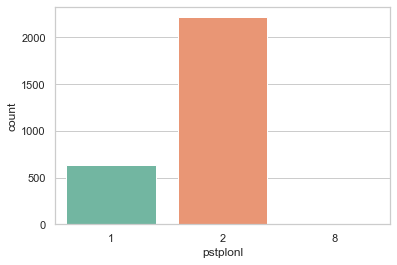

In [44]:
print('Missing Value Check')
print(ess_de['pstplonl'].value_counts())
sns.countplot(x='pstplonl', data=ess_de, palette='Set2')
plt.show()

In [45]:
raw_pstplonl = ess_de["pstplonl"]

In [46]:
raw_pstplonl = raw_pstplonl[raw_pstplonl.isin([8])==False]

In [47]:
ess_de.insert(5, "raw_pstplonl",raw_pstplonl, True)

In [48]:
ess_de.raw_pstplonl.isnull().sum()

2

In [49]:
ess_de["raw_pstplonl"].fillna(0, inplace=True)

In [50]:
ess_de.loc[(ess_de.raw_pstplonl == 2),'raw_pstplonl'] = 0

Posted or shared anything about politics online last 12 months: 0-No 1-Yes
0.0    2219
1.0     633
Name: raw_pstplonl, dtype: int64


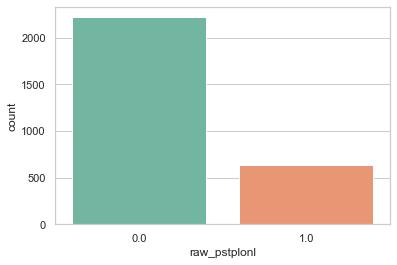

In [51]:
print('Posted or shared anything about politics online last 12 months: 0-No 1-Yes')
print(ess_de['raw_pstplonl'].value_counts())
sns.countplot(x='raw_pstplonl', data=ess_de, palette='Set2')
plt.show()

In [52]:
ess_de.describe()

,raw_nwspol,raw_polintr,raw_vote,raw_sgnptit,raw_pstplonl,essround,edition,idno,dweight,pspwght,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.00000,2852.0,2.852000e+03,2.852000e+03,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2660.000000
mean,67.176367,0.680926,0.805750,0.377279,0.22195,8.0,2.200000e+00,1.072440e+07,1.000000,1.000000,...,9.274895,2016.116059,13.956522,24.751403,15.264376,9.267532,2016.117461,15.284712,28.457574,84.537218
std,84.160205,0.466200,0.395691,0.484791,0.41563,0.0,1.123743e-13,2.032128e+06,0.339962,0.579593,...,3.102509,0.320352,3.254579,18.885380,8.206786,3.117419,0.322026,3.259974,17.046472,35.041475
min,0.000000,0.000000,0.000000,0.000000,0.00000,8.0,2.200000e+00,1.000000e+07,0.512526,0.198633,...,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,28.000000
25%,30.000000,0.000000,1.000000,0.000000,0.00000,8.0,2.200000e+00,1.000289e+07,0.512526,0.605012,...,9.000000,2016.000000,11.000000,8.000000,8.000000,9.000000,2016.000000,12.000000,14.000000,67.000000
50%,60.000000,1.000000,1.000000,0.000000,0.00000,8.0,2.200000e+00,1.000588e+07,1.237005,0.784708,...,10.000000,2016.000000,14.000000,21.000000,15.000000,10.000000,2016.000000,16.000000,28.000000,79.000000
75%,90.000000,1.000000,1.000000,1.000000,0.00000,8.0,2.200000e+00,1.000877e+07,1.237005,1.326770,...,11.000000,2016.000000,17.000000,41.000000,22.000000,11.000000,2016.000000,18.000000,43.000000,94.000000
max,1200.000000,1.000000,1.000000,1.000000,1.00000,8.0,2.200000e+00,1.930005e+07,1.237005,4.000091,...,12.000000,2017.000000,23.000000,59.000000,31.000000,12.000000,2017.000000,23.000000,59.000000,1083.000000


6 - trstplt

Trust in Politicians
5     574
3     410
4     399
6     360
2     281
0     260
7     245
1     148
8     119
9      21
10     15
88     14
77      6
Name: trstplt, dtype: int64


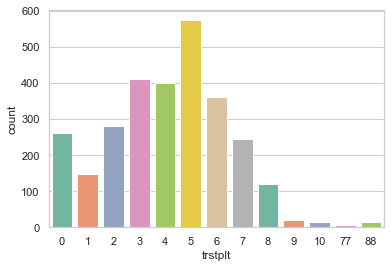

In [53]:
print('Trust in Politicians')
print(ess_de['trstplt'].value_counts())
sns.countplot(x='trstplt', data=ess_de, palette='Set2')
plt.show()

In [54]:
raw_trstplt = ess_de["trstplt"]

In [55]:
ess_de.insert(6, "raw_trstplt",raw_trstplt, True)

In [56]:
#The null values are filled with median. 

ess_de.loc[(ess_de.raw_trstplt == 77),'raw_trstplt'] = 5
ess_de.loc[(ess_de.raw_trstplt == 88),'raw_trstplt'] = 5

Voted in the Last National Election
5     594
3     410
4     399
6     360
2     281
0     260
7     245
1     148
8     119
9      21
10     15
Name: raw_trstplt, dtype: int64


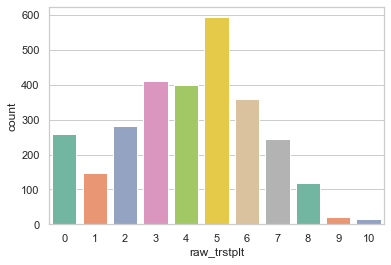

In [57]:
print('Voted in the Last National Election')
print(ess_de['raw_trstplt'].value_counts())
sns.countplot(x='raw_trstplt', data=ess_de, palette='Set2')
plt.show()

In [58]:
ess_de["raw_trstplt"].count()

2852

7 - trstprt

In [59]:
ess_de["trstprt"].count()

2852

Trust in political parties
5     582
3     442
4     429
6     355
2     296
7     228
0     206
1     137
8     106
88     32
9      22
10     11
77      6
Name: trstprt, dtype: int64


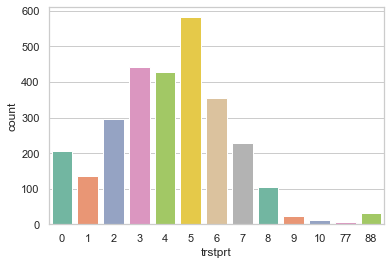

In [60]:
print('Trust in political parties')
print(ess_de["trstprt"].value_counts())
sns.countplot(x='trstprt', data=ess_de, palette='Set2')
plt.show()

In [61]:
raw_trstprt = ess_de["trstprt"]

In [62]:
ess_de.insert(7, "raw_trstprt",raw_trstprt, True)

In [63]:
#the null values will be replaced with the median. 

ess_de.loc[(ess_de.raw_trstprt == 77),'raw_trstprt'] = 4
ess_de.loc[(ess_de.raw_trstprt == 88),'raw_trstprt'] = 4

Trust in political parties
5     582
4     467
3     442
6     355
2     296
7     228
0     206
1     137
8     106
9      22
10     11
Name: raw_trstprt, dtype: int64


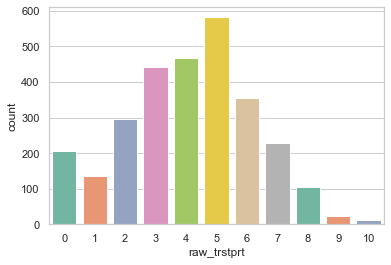

In [64]:
print('Trust in political parties')
print(ess_de["raw_trstprt"].value_counts())
sns.countplot(x='raw_trstprt', data=ess_de, palette='Set2')
plt.show()

8 - lrscale

Placement on left right scale
5     1023
3      425
4      369
6      241
2      223
7      185
0      118
8       88
88      59
1       58
77      28
10      23
9       12
Name: lrscale, dtype: int64


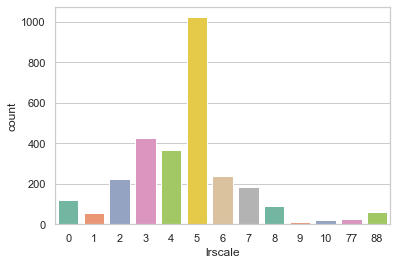

In [65]:
print('Placement on left right scale')
print(ess_de["lrscale"].value_counts())
sns.countplot(x='lrscale', data=ess_de, palette='Set2')
plt.show()

In [66]:
print(ess_de["trstprt"].mean())
print(ess_de["trstprt"].median())

5.203716690042076
4.0


In [67]:
raw_lrscale = ess_de["lrscale"]

In [68]:
ess_de.insert(8, "raw_lrscale",raw_lrscale, True)

In [69]:
#Weighted distribution of missing values

ess_de.loc[(ess_de.raw_lrscale == 77),'raw_lrscale'] = 3
ess_de.loc[(ess_de.raw_lrscale == 88),'raw_lrscale'] = 5

Placement on left right scale
5     1082
3      453
4      369
6      241
2      223
7      185
0      118
8       88
1       58
10      23
9       12
Name: raw_lrscale, dtype: int64


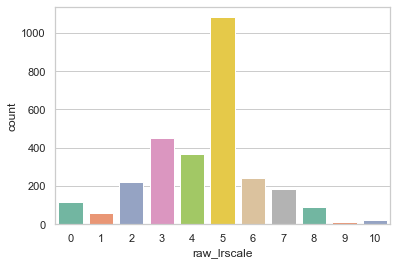

In [70]:
print('Placement on left right scale')
print(ess_de["raw_lrscale"].value_counts())
sns.countplot(x='raw_lrscale', data=ess_de, palette='Set2')
plt.show()

9 - stfgov

How satisfied with the national government
5     528
6     480
7     438
4     333
3     323
8     228
2     192
0     134
1      66
88     58
9      48
10     22
77      2
Name: stfgov, dtype: int64


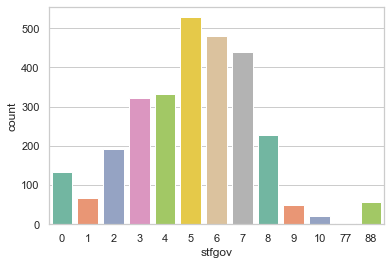

In [71]:
print('How satisfied with the national government')
print(ess_de["stfgov"].value_counts())
sns.countplot(x='stfgov', data=ess_de, palette='Set2')
plt.show()

In [72]:
raw_stfgov = ess_de["stfgov"]

In [73]:
ess_de.insert(9, "raw_stfgov",raw_stfgov, True)

In [74]:
#Replacing the null values with median value. 

ess_de.loc[(ess_de.raw_stfgov == 77),'raw_stfgov'] = 5
ess_de.loc[(ess_de.raw_stfgov == 88),'raw_stfgov'] = 5

10 - stfdem

In [75]:
ess_de.stfdem.count()

2852

How satisfied with the way democracy works in country
8     533
7     426
5     384
6     362
4     260
3     238
9     232
2     139
10     93
0      92
1      65
88     26
77      2
Name: stfdem, dtype: int64


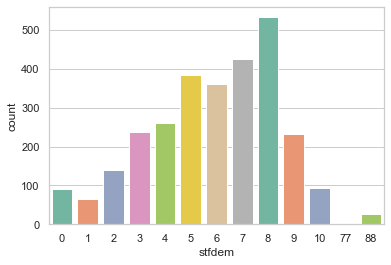

In [76]:
print('How satisfied with the way democracy works in country')
print(ess_de["stfdem"].value_counts())
sns.countplot(x='stfdem', data=ess_de, palette='Set2')
plt.show()

In [77]:
raw_stfdem = ess_de["stfdem"]

In [78]:
ess_de.insert(9, "raw_stfdem",raw_stfdem, True)

In [79]:
#Replacing the null values with median value. 

ess_de.loc[(ess_de.raw_stfdem == 77),'raw_stfdem'] = 6
ess_de.loc[(ess_de.raw_stfdem == 88),'raw_stfdem'] = 6

How satisfied with the way democracy works in country
8     533
7     426
6     390
5     384
4     260
3     238
9     232
2     139
10     93
0      92
1      65
Name: raw_stfdem, dtype: int64


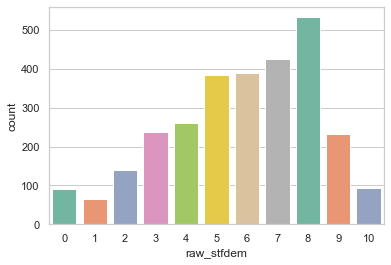

In [80]:
print('How satisfied with the way democracy works in country')
print(ess_de["raw_stfdem"].value_counts())
sns.countplot(x='raw_stfdem', data=ess_de, palette='Set2')
plt.show()

In [81]:
ess_de.describe()

,raw_nwspol,raw_polintr,raw_vote,raw_sgnptit,raw_pstplonl,raw_trstplt,raw_trstprt,raw_lrscale,raw_stfdem,raw_stfgov,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.00000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2660.000000
mean,67.176367,0.680926,0.805750,0.377279,0.22195,4.092567,4.107644,4.394109,5.827840,4.948457,...,9.274895,2016.116059,13.956522,24.751403,15.264376,9.267532,2016.117461,15.284712,28.457574,84.537218
std,84.160205,0.466200,0.395691,0.484791,0.41563,2.232501,2.120366,1.831083,2.425781,2.164202,...,3.102509,0.320352,3.254579,18.885380,8.206786,3.117419,0.322026,3.259974,17.046472,35.041475
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,28.000000
25%,30.000000,0.000000,1.000000,0.000000,0.00000,3.000000,3.000000,3.000000,4.000000,3.000000,...,9.000000,2016.000000,11.000000,8.000000,8.000000,9.000000,2016.000000,12.000000,14.000000,67.000000
50%,60.000000,1.000000,1.000000,0.000000,0.00000,4.000000,4.000000,5.000000,6.000000,5.000000,...,10.000000,2016.000000,14.000000,21.000000,15.000000,10.000000,2016.000000,16.000000,28.000000,79.000000
75%,90.000000,1.000000,1.000000,1.000000,0.00000,6.000000,6.000000,5.000000,8.000000,7.000000,...,11.000000,2016.000000,17.000000,41.000000,22.000000,11.000000,2016.000000,18.000000,43.000000,94.000000
max,1200.000000,1.000000,1.000000,1.000000,1.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.000000,2017.000000,23.000000,59.000000,31.000000,12.000000,2017.000000,23.000000,59.000000,1083.000000


In [ ]:
# Creating a new dataframe with the raw variables. 

#check the code and then run it

#de_train = ess_de["raw_nwspol", "raw_polintr", "raw_vote", "raw_sgnptit", "raw_trstplt",
                  "raw_lrscale", "raw_stfdem", "raw_stfgov" ]

11 - gincdif

Government should reduce differences in income levels
2    1302
1     776
3     386
4     319
5      45
8      19
7       5
Name: gincdif, dtype: int64


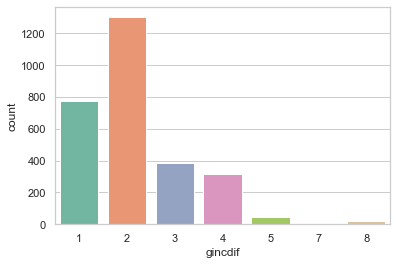

In [81]:
print('Government should reduce differences in income levels')
print(ess_de["gincdif"].value_counts())
sns.countplot(x='gincdif', data=ess_de, palette='Set2')
plt.show()

In [82]:
raw_gincdif= ess_de["gincdif"]

In [83]:
ess_de.insert(11, "raw_gincdif",raw_gincdif, True)

In [84]:
# Replacing the null values with median value

ess_de.loc[(ess_de.raw_gincdif == 7),'raw_gincdif'] = 2
ess_de.loc[(ess_de.raw_gincdif == 8),'raw_gincdif'] = 2

Government should reduce differences in income levels
2    1326
1     776
3     386
4     319
5      45
Name: raw_gincdif, dtype: int64


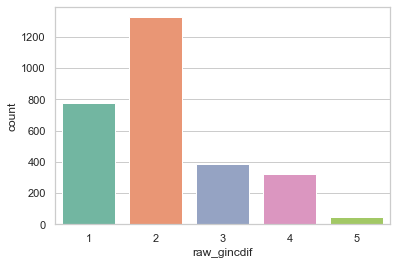

In [85]:
print('Government should reduce differences in income levels')
print(ess_de["raw_gincdif"].value_counts())
sns.countplot(x='raw_gincdif', data=ess_de, palette='Set2')
plt.show()

12 - gvslvue

Standard of living for the unemployed, governments' responsibility
5     664
7     448
8     414
6     399
4     239
3     225
10    203
9     120
2      68
0      28
88     27
1      13
77      4
Name: gvslvue, dtype: int64


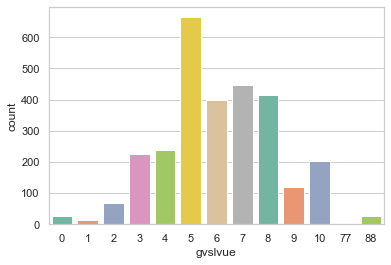

In [86]:
print("Standard of living for the unemployed, governments' responsibility")
print(ess_de["gvslvue"].value_counts())
sns.countplot(x='gvslvue', data=ess_de, palette='Set2')
plt.show()

In [87]:
ess_de["gvslvue"].count()

2852

In [88]:
raw_gvslvue= ess_de["gvslvue"]

In [89]:
ess_de.insert(12, "raw_gvslvue",raw_gvslvue, True)

In [90]:
# Replacing the null values with the median value.

ess_de.loc[(ess_de.raw_gvslvue == 77),'raw_gvslvue'] = 6
ess_de.loc[(ess_de.raw_gvslvue == 88),'raw_gvslvue'] = 6

Standard of living for the unemployed, governments' responsibility
5     664
7     448
6     430
8     414
4     239
3     225
10    203
9     120
2      68
0      28
1      13
Name: raw_gvslvue, dtype: int64


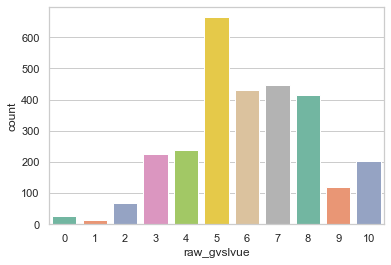

In [91]:
print("Standard of living for the unemployed, governments' responsibility")
print(ess_de["raw_gvslvue"].value_counts())
sns.countplot(x='raw_gvslvue', data=ess_de, palette='Set2')
plt.show()

13 - stfeco

How satisfied with present state of economy in country
8     671
7     610
5     365
6     355
9     250
4     165
10    139
3     129
2      69
88     33
0      33
1      31
77      2
Name: stfeco, dtype: int64


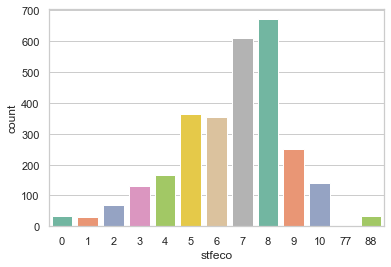

In [92]:
print("How satisfied with present state of economy in country")
print(ess_de["stfeco"].value_counts())
sns.countplot(x='stfeco', data=ess_de, palette='Set2')
plt.show()

In [93]:
raw_stfeco= ess_de["stfeco"]

In [94]:
ess_de.insert(12, "raw_stfeco",raw_stfeco, True)

In [95]:
# Replacing the null values with the median value.

ess_de.loc[(ess_de.raw_stfeco == 77),'raw_stfeco'] = 7
ess_de.loc[(ess_de.raw_stfeco == 88),'raw_stfeco'] = 7

How satisfied with present state of economy in country
8     671
7     645
5     365
6     355
9     250
4     165
10    139
3     129
2      69
0      33
1      31
Name: raw_stfeco, dtype: int64


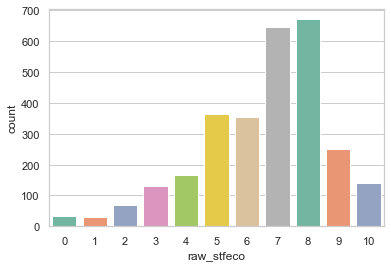

In [96]:
print("How satisfied with present state of economy in country")
print(ess_de["raw_stfeco"].value_counts())
sns.countplot(x='raw_stfeco', data=ess_de, palette='Set2')
plt.show()

14 - emplrel

Employment relation
1    2357
2     295
6     140
3      52
7       6
8       2
Name: emplrel, dtype: int64


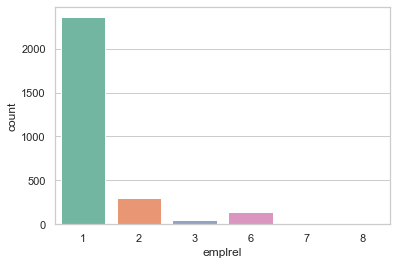

In [97]:
print("Employment relation")
print(ess_de["emplrel"].value_counts())
sns.countplot(x='emplrel', data=ess_de, palette='Set2')
plt.show()

In [98]:
raw_emplrel = ess_de["emplrel"]

In [99]:
raw_emplrel = raw_emplrel[raw_emplrel.isin(no_answer_5)==False]

In [100]:
ess_de.insert(14, "raw_emplrel", raw_emplrel, True)

In [101]:
ess_de["raw_emplrel"].isnull().sum()

148

In [102]:
# Weighted distribution of the null values across values

ess_de["raw_emplrel"].fillna(1, inplace=True, limit=124)

In [103]:
ess_de["raw_emplrel"].fillna(2, inplace=True, limit=16)

In [104]:
ess_de["raw_emplrel"].fillna(3, inplace=True)

Employment relation
1.0    2481
2.0     311
3.0      60
Name: raw_emplrel, dtype: int64


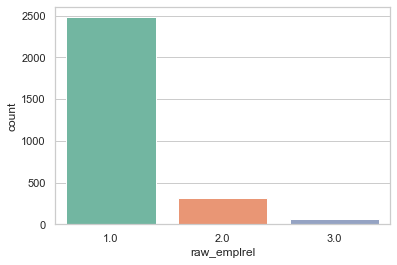

In [105]:
print("Employment relation")
print(ess_de["raw_emplrel"].value_counts())
sns.countplot(x='raw_emplrel', data=ess_de, palette='Set2')
plt.show()

15 - hincsrca

In [106]:
#ess_de.drop("raw_hincsrca", axis=1, inplace = True )

Main source of household income
1     1734
4      699
2      199
5       81
6       50
8       32
7       24
77      12
88      11
3       10
Name: hincsrca, dtype: int64


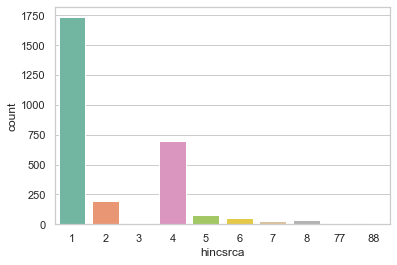

In [107]:
print("Main source of household income")
print(ess_de["hincsrca"].value_counts())
sns.countplot(x='hincsrca', data=ess_de, palette='Set2')
plt.show()

In [108]:
raw_hincsrca = ess_de["hincsrca"]

In [109]:
raw_hincsrca = raw_hincsrca[raw_hincsrca.isin([77,88])==False]

In [110]:
ess_de.insert(15, "raw_hincsrca", raw_hincsrca, True)

In [111]:
ess_de["raw_hincsrca"].isnull().sum()

23

In [112]:
# Weighted distribution of the null values across values

ess_de["raw_hincsrca"].fillna(1, inplace=True, limit=15)

In [113]:
ess_de["raw_hincsrca"].fillna(4, inplace=True, limit=5)

In [114]:
ess_de["raw_hincsrca"].fillna(2, inplace=True, limit=3)

Main source of household income
1.0    1749
4.0     704
2.0     202
5.0      81
6.0      50
8.0      32
7.0      24
3.0      10
Name: raw_hincsrca, dtype: int64


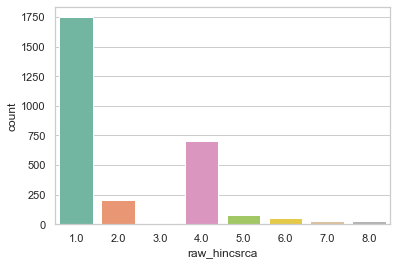

In [115]:
print("Main source of household income")
print(ess_de["raw_hincsrca"].value_counts())
sns.countplot(x='raw_hincsrca', data=ess_de, palette='Set2')
plt.show()

16 - hinctnta

Household's total net income, all sources
8     327
7     293
9     279
10    273
4     271
5     255
6     237
3     218
1     202
77    201
2     192
88    104
Name: hinctnta, dtype: int64


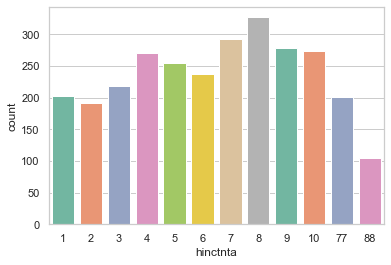

In [116]:
print("Household's total net income, all sources")
print(ess_de["hinctnta"].value_counts())
sns.countplot(x='hinctnta', data=ess_de, palette='Set2')
plt.show()

In [117]:
raw_hinctnta = ess_de["hinctnta"]

In [118]:
raw_hinctnta = raw_hinctnta[raw_hinctnta.isin([77,88])==False]

In [119]:
ess_de.insert(16, "raw_hinctnta", raw_hinctnta, True)

In [120]:
ess_de["raw_hinctnta"].isnull().sum()

305

In [121]:
# Weighted distribution of the null values across values

ess_de["raw_hinctnta"].fillna(8, inplace=True, limit=35)

In [122]:
ess_de["raw_hinctnta"].fillna(7, inplace=True, limit=30)

In [123]:
ess_de["raw_hinctnta"].fillna(9, inplace=True, limit=30)

In [124]:
ess_de["raw_hinctnta"].fillna(10, inplace=True, limit=30)

In [125]:
ess_de["raw_hinctnta"].fillna(4, inplace=True, limit=30)

In [126]:
ess_de["raw_hinctnta"].fillna(5, inplace=True, limit=30)

In [127]:
ess_de["raw_hinctnta"].fillna(6, inplace=True, limit=30)

In [128]:
ess_de["raw_hinctnta"].fillna(3, inplace=True, limit=30)

In [129]:
ess_de["raw_hinctnta"].fillna(2, inplace=True, limit=30)

In [130]:
ess_de["raw_hinctnta"].isnull().sum()

30

In [131]:
ess_de["raw_hinctnta"].fillna(1, inplace=True)

Household's total net income, all sources
8.0     362
7.0     323
9.0     309
10.0    303
4.0     301
5.0     285
6.0     267
3.0     248
1.0     232
2.0     222
Name: raw_hinctnta, dtype: int64


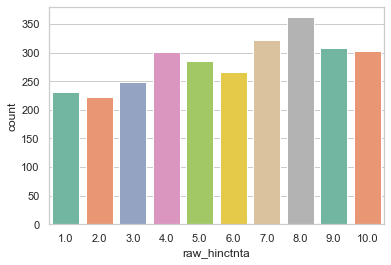

In [132]:
print("Household's total net income, all sources")
print(ess_de["raw_hinctnta"].value_counts())
sns.countplot(x='raw_hinctnta', data=ess_de, palette='Set2')
plt.show()

17 - ppltrst

Most people can be trusted or you can't be too careful
5     604
7     501
6     377
8     333
4     326
3     274
2     145
0     122
9      65
10     55
1      46
88      3
77      1
Name: ppltrst, dtype: int64


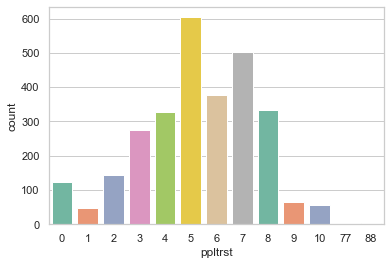

In [133]:
print("Most people can be trusted or you can't be too careful")
print(ess_de["ppltrst"].value_counts())
sns.countplot(x='ppltrst', data=ess_de, palette='Set2')
plt.show()

In [134]:
raw_ppltrst = ess_de["ppltrst"]

In [135]:
raw_ppltrst = raw_ppltrst[raw_ppltrst.isin([77,88])==False]

In [136]:
ess_de.insert(17, "raw_ppltrst", raw_ppltrst, True)

In [137]:
ess_de.raw_ppltrst.isnull().sum()

4

In [138]:
ess_de["raw_ppltrst"].fillna(5, inplace=True)

In [139]:
ess_de.raw_ppltrst.isnull().sum()

0

Most people can be trusted or you can't be too careful
5.0     608
7.0     501
6.0     377
8.0     333
4.0     326
3.0     274
2.0     145
0.0     122
9.0      65
10.0     55
1.0      46
Name: raw_ppltrst, dtype: int64


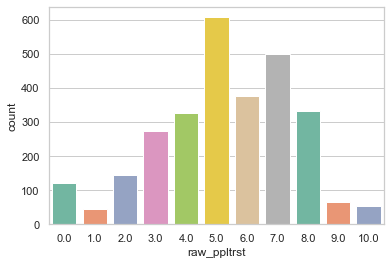

In [140]:
print("Most people can be trusted or you can't be too careful")
print(ess_de["raw_ppltrst"].value_counts())
sns.countplot(x='raw_ppltrst', data=ess_de, palette='Set2')
plt.show()

18 - pplhlp

Most of the time people helpful or mostly looking out for themselves
5     730
7     464
6     387
4     336
8     327
3     279
2     118
9      81
0      49
10     44
1      35
88      2
Name: pplhlp, dtype: int64


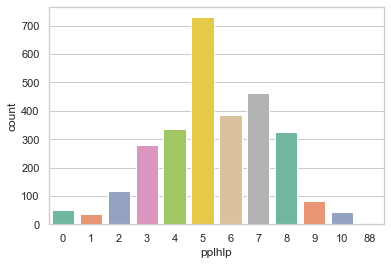

In [141]:
print("Most of the time people helpful or mostly looking out for themselves")
print(ess_de["pplhlp"].value_counts())
sns.countplot(x="pplhlp", data=ess_de, palette='Set2')
plt.show()

In [142]:
raw_pplhlp  = ess_de["pplhlp"]

In [143]:
raw_pplhlp = raw_pplhlp[raw_pplhlp.isin([88])==False]

In [144]:
ess_de.insert(18, "raw_pplhlp", raw_pplhlp, True)

In [145]:
ess_de.raw_pplhlp.isnull().sum()

2

In [146]:
ess_de["raw_pplhlp"].fillna(5, inplace=True)

In [147]:
ess_de.raw_pplhlp.isnull().sum()

0

19 - pplfair

Most people try to take advantage of you, or try to be fair
7     643
5     527
8     509
6     365
4     227
9     183
3     160
2      85
10     80
0      46
1      22
88      5
Name: pplfair, dtype: int64


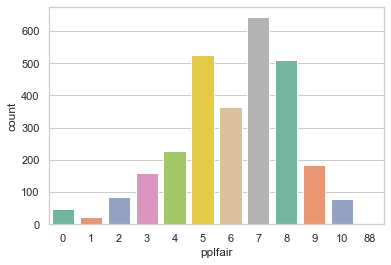

In [148]:
print("Most people try to take advantage of you, or try to be fair")
print(ess_de["pplfair"].value_counts())
sns.countplot(x="pplfair", data=ess_de, palette='Set2')
plt.show()

In [149]:
raw_pplfair = ess_de["pplfair"]

In [150]:
raw_pplfair = raw_pplfair[raw_pplfair.isin([88])==False]

In [151]:
ess_de.insert(19, "raw_pplfair", raw_pplfair, True)

In [152]:
ess_de.raw_pplfair.isnull().sum()

5

In [153]:
ess_de["raw_pplfair"].fillna(7, inplace=True, limit = 3)

In [154]:
ess_de["raw_pplfair"].fillna(5, inplace=True)

Most people try to take advantage of you, or try to be fair
7.0     646
5.0     529
8.0     509
6.0     365
4.0     227
9.0     183
3.0     160
2.0      85
10.0     80
0.0      46
1.0      22
Name: raw_pplfair, dtype: int64


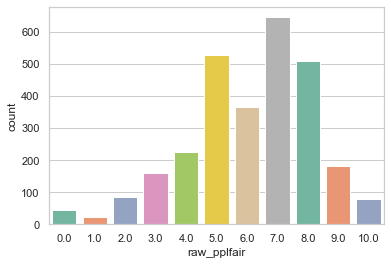

In [155]:
print("Most people try to take advantage of you, or try to be fair")
print(ess_de["raw_pplfair"].value_counts())
sns.countplot(x="raw_pplfair", data=ess_de, palette='Set2')
plt.show()

20 - stflife

How satisfied with life as a whole
8     822
9     546
7     440
10    399
5     217
6     186
3      82
4      78
2      38
0      22
1      16
77      5
88      1
Name: stflife, dtype: int64


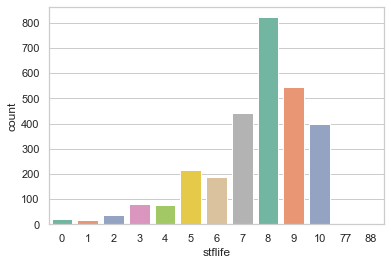

In [156]:
print("How satisfied with life as a whole")
print(ess_de["stflife"].value_counts())
sns.countplot(x="stflife", data=ess_de, palette='Set2')
plt.show()

In [157]:
raw_stflife = ess_de["stflife"]

In [158]:
raw_stflife = raw_stflife[raw_stflife.isin([77,88])==False]

In [159]:
ess_de.insert(20, "raw_stflife", raw_stflife, True)

In [160]:
ess_de.raw_stflife.isnull().sum()

6

In [161]:
ess_de["raw_stflife"].fillna(8, inplace = True, limit = 4)

In [162]:
ess_de["raw_stflife"].fillna(9, inplace = True, limit = 1)

In [163]:
ess_de["raw_stflife"].fillna(7, inplace = True)

How satisfied with life as a whole
8.0     826
9.0     547
7.0     441
10.0    399
5.0     217
6.0     186
3.0      82
4.0      78
2.0      38
0.0      22
1.0      16
Name: raw_stflife, dtype: int64


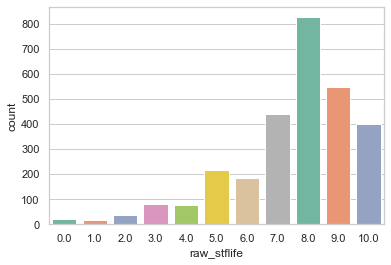

In [164]:
print("How satisfied with life as a whole")
print(ess_de["raw_stflife"].value_counts())
sns.countplot(x="raw_stflife", data=ess_de, palette='Set2')
plt.show()

In [165]:
ess_de.raw_stflife.count()

2852

21 - happy

How happy are you
8     958
9     631
7     442
10    347
5     170
6     152
4      58
3      47
2      22
1      12
0      10
77      2
88      1
Name: happy, dtype: int64


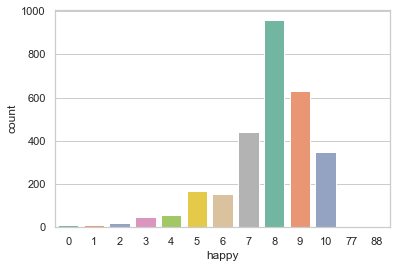

In [166]:
print("How happy are you")
print(ess_de["happy"].value_counts())
sns.countplot(x="happy", data=ess_de, palette='Set2')
plt.show()

In [167]:
raw_happy = ess_de["happy"]

In [168]:
ess_de.insert(21, "raw_happy", raw_happy, True)

In [169]:
ess_de.loc[(ess_de.raw_happy == 77),'raw_happy'] = 8

In [170]:
ess_de.loc[(ess_de.raw_happy == 88),'raw_happy'] = 8

How happy are you
8     961
9     631
7     442
10    347
5     170
6     152
4      58
3      47
2      22
1      12
0      10
Name: raw_happy, dtype: int64


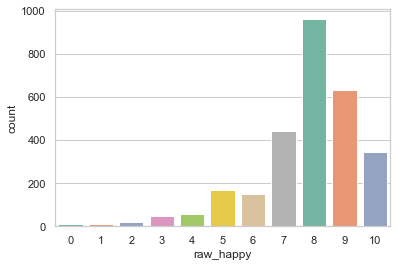

In [171]:
print("How happy are you")
print(ess_de["raw_happy"].value_counts())
sns.countplot(x="raw_happy", data=ess_de, palette='Set2')
plt.show()

22 - health

Subjective general health
2    1243
3     868
1     465
4     225
5      48
8       2
7       1
Name: health, dtype: int64


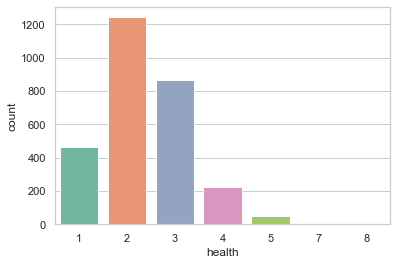

In [174]:
print("Subjective general health")
print(ess_de["health"].value_counts())
sns.countplot(x="health", data=ess_de, palette='Set2')
plt.show()

In [175]:
raw_health = ess_de["health"]

In [176]:
ess_de.insert(22, "raw_health", raw_health, True)

In [177]:
ess_de.loc[(ess_de.raw_health == 7),'raw_health'] = 2

In [178]:
ess_de.loc[(ess_de.raw_health == 8),'raw_health'] = 2

Subjective general health
2    1246
3     868
1     465
4     225
5      48
Name: raw_health, dtype: int64


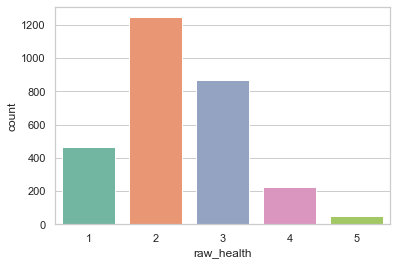

In [179]:
print("Subjective general health")
print(ess_de["raw_health"].value_counts())
sns.countplot(x="raw_health", data=ess_de, palette='Set2')
plt.show()

23 - rlgblg

Belonging to particular religion or denomination
1    1560
2    1289
8       3
Name: rlgblg, dtype: int64


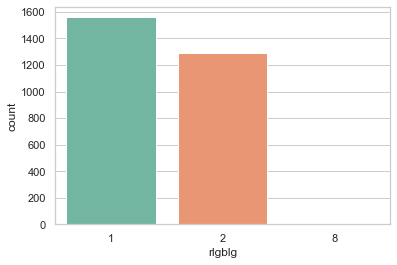

In [180]:
print("Belonging to particular religion or denomination")
print(ess_de["rlgblg"].value_counts())
sns.countplot(x="rlgblg", data=ess_de, palette='Set2')
plt.show()

In [181]:
raw_rlgblg = ess_de["rlgblg"]

In [182]:
ess_de.insert(23, 'raw_rlgblg', raw_rlgblg, True )

In [183]:
ess_de.loc[(ess_de.raw_rlgblg == 8),'raw_rlgblg'] = 1

In [184]:
#Converting the varibale to binomial
ess_de.loc[(ess_de.raw_rlgblg == 2),'raw_rlgblg'] = 0

Belonging to particular religion or denomination
1    1563
0    1289
Name: raw_rlgblg, dtype: int64


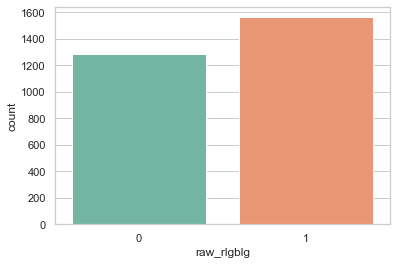

In [185]:
print("Belonging to particular religion or denomination")
print(ess_de["raw_rlgblg"].value_counts())
sns.countplot(x="raw_rlgblg", data=ess_de, palette='Set2')
plt.show()

24 - rlgdgr

Belonging to particular religion or denomination
0     678
5     397
8     268
7     264
3     252
6     245
2     223
1     171
4     171
10    104
9      74
77      3
88      2
Name: rlgdgr, dtype: int64


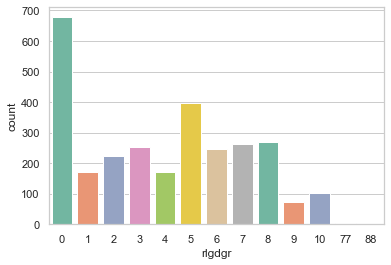

In [186]:
print("Belonging to particular religion or denomination")
print(ess_de["rlgdgr"].value_counts())
sns.countplot(x="rlgdgr", data=ess_de, palette='Set2')
plt.show()

In [187]:
raw_rlgdgr = ess_de["rlgdgr"]

In [188]:
ess_de.insert(24, "raw_rlgdgr", raw_rlgdgr, True)

In [189]:
ess_de.loc[(ess_de.raw_rlgdgr == 77)] = 0
ess_de.loc[(ess_de.raw_rlgdgr == 88)] = 5

Belonging to particular religion or denomination
0     681
5     399
8     268
7     264
3     252
6     245
2     223
1     171
4     171
10    104
9      74
Name: raw_rlgdgr, dtype: int64


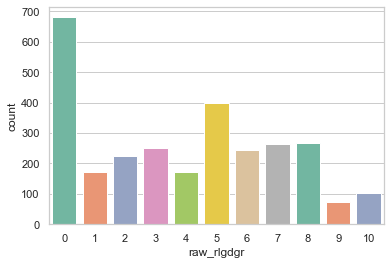

In [190]:
print("Belonging to particular religion or denomination")
print(ess_de["raw_rlgdgr"].value_counts())
sns.countplot(x="raw_rlgdgr", data=ess_de, palette='Set2')
plt.show()

In [193]:
ess_de.raw_rlgdgr.count()

2852

25 - smdfslv

For fair society, differences in standard of living should be small
2    1448
3     625
4     439
1     287
5      30
8      18
0       3
7       2
Name: smdfslv, dtype: int64


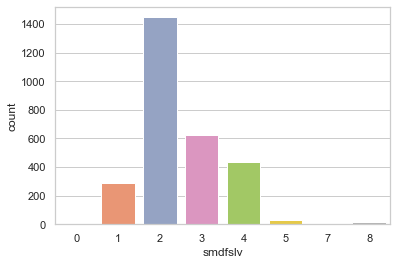

In [194]:
print("For fair society, differences in standard of living should be small")
print(ess_de["smdfslv"].value_counts())
sns.countplot(x="smdfslv", data=ess_de, palette='Set2')
plt.show()

In [195]:
ess_de.loc[(ess_de.smdfslv == 7)] = 3
ess_de.loc[(ess_de.smdfslv == 8)] = 2

In [197]:
ess_de.loc[(ess_de.smdfslv == 0)] = 3

For fair society, differences in standard of living should be small
2    1466
3     630
4     439
1     287
5      30
Name: raw_smdfslv, dtype: int64


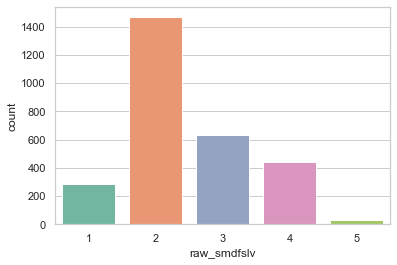

In [204]:
print("For fair society, differences in standard of living should be small")
print(ess_de["raw_smdfslv"].value_counts())
sns.countplot(x="raw_smdfslv", data=ess_de, palette='Set2')
plt.show()

In [205]:
ess_de.raw_smdfslv.isnull().sum()

0

26 - ipeqopt

Important that people are treated equally and have equal opportunities
2    1253
1     889
3     423
4     132
5     115
6      23
7      10
8       7
Name: ipeqopt, dtype: int64


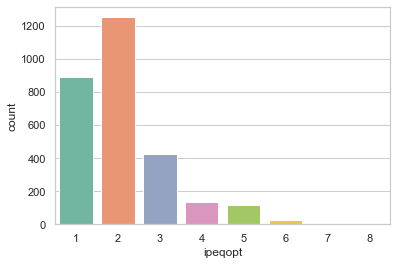

In [206]:
print("Important that people are treated equally and have equal opportunities")
print(ess_de["ipeqopt"].value_counts())
sns.countplot(x="ipeqopt", data=ess_de, palette='Set2')
plt.show()

In [207]:
ess_de.loc[(ess_de.ipeqopt == 7)] = 2
ess_de.loc[(ess_de.ipeqopt == 8)] = 1

In [208]:
raw_ipeqopt = ess_de["ipeqopt"]

In [209]:
ess_de.insert(26, "raw_ipeqopt", raw_ipeqopt, True)

Important that people are treated equally and have equal opportunities
2    1263
1     896
3     423
4     132
5     115
6      23
Name: raw_ipeqopt, dtype: int64


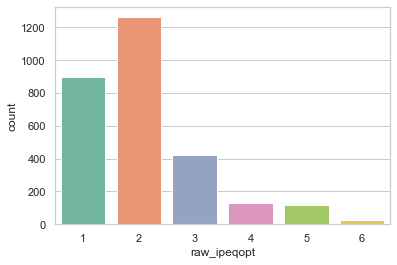

In [210]:
print("Important that people are treated equally and have equal opportunities")
print(ess_de["raw_ipeqopt"].value_counts())
sns.countplot(x="raw_ipeqopt", data=ess_de, palette='Set2')
plt.show()

27 - dfincac

Large differences in income acceptable to reward talents and efforts
2.0    1301
4.0     661
3.0     539
5.0     194
1.0     157
Name: raw_dfincac, dtype: int64


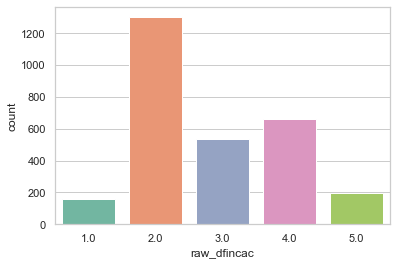

In [222]:
print("Large differences in income acceptable to reward talents and efforts")
print(ess_de["raw_dfincac"].value_counts())
sns.countplot(x="raw_dfincac", data=ess_de, palette='Set2')
plt.show()

In [216]:
raw_dfincac = ess_de["dfincac"]

In [217]:
raw_dfincac = raw_dfincac[raw_dfincac.isin([8]) == False]

In [218]:
ess_de.insert(27, "raw_dfincac", raw_dfincac, True)

In [219]:
ess_de["raw_dfincac"].fillna(2, inplace=True, limit=7)

In [220]:
ess_de["raw_dfincac"].fillna(4, inplace=True, limit=2)

In [221]:
ess_de["raw_dfincac"].fillna(3, inplace=True)

In [224]:
ess_de.raw_dfincac.isnull().sum()

0

28 - gndr

Gender
1    1494
2    1351
3       5
5       2
Name: gndr, dtype: int64


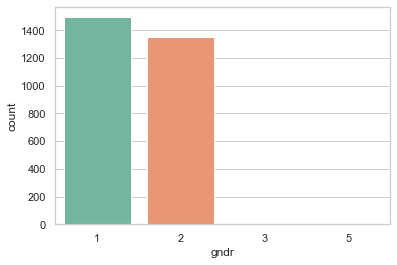

In [225]:
print("Gender")
print(ess_de["gndr"].value_counts())
sns.countplot(x="gndr", data=ess_de, palette='Set2')
plt.show()

In [226]:
ess_de.loc[(ess_de.gndr == 3)] = 1
ess_de.loc[(ess_de.gndr == 5)] = 2

Gender
1    1499
2    1353
Name: raw_gndr, dtype: int64


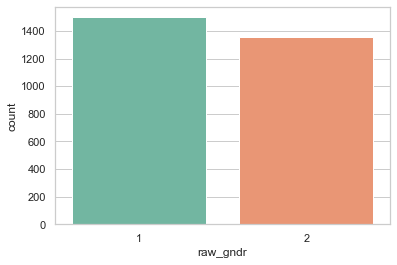

In [230]:
print("Gender")
print(ess_de["raw_gndr"].value_counts())
sns.countplot(x="raw_gndr", data=ess_de, palette='Set2')
plt.show()

In [228]:
raw_gndr = ess_de["gndr"]

In [229]:
ess_de.insert(28, "raw_gndr", raw_gndr)

29 - agea

In [231]:
ess_de["agea"].unique()

array([ 22,  58,  64,  52,  67,  73,  34,  40,  77,  30,  41,  70,  48,
        44,  17,  33,  92,  53,  80,  31,  50,  26,   2,  85,  61,  42,
        54,  36,  35,  72,  25,  63,  38,  32,  45,  16,  46,  68,  62,
        74,  79,  65,  21,  55,  81,  76,  49,  28,   1,  59,  47,  27,
        75,  66,  23,  20,  15,  39,  29,  43,  18,  19,  56,  69,  24,
        60,  57,  78,  37,  71,  51,  84,  86,  82,  94,  88,  83,  87,
        93, 999,  91,  90,  89])

In [233]:
ess_de.loc[(ess_de.agea == 999)] = ess_de["agea"].median

In [265]:
#burda da ikinci kez aşağıdaki kodu koşunca aşağıya eduyrs ekledi.. oysaki o başka bir columns


ess_de["raw_agea"].unique()

array([22, 58, 64, 52, 67, 73, 34, 40, 77, 30, 41, 70, 48, 44, 17, 33, 92,
       53, 80, 31, 50, 26, 2, 85, 61, 42, 54, 36, 35, 72, 25, 63, 38, 32,
       45, 16, 46, 68, 62, 74, 79, 65, 21, 55, 81, 76, 49, 28, 1, 59, 47,
       27, 75, 66, 23, 20, 15, 39, 29, 43, 18, 19, 56, 69, 24, 60, 57, 78,
       37, 71, 51, 84, 86, 82, 94, 88, 83, 87, 93,
       <bound method Series.median of 0       22
1       58
2       64
3       52
4       67
        ..
2847    42
2848    38
2849    21
2850    65
2851    61
Name: agea, Length: 2852, dtype: int64>,
       91, 90, 89,
       <bound method Series.median of 0       12
1       10
2       12
3       10
4       19
        ..
2847    14
2848    15
2849    14
2850    15
2851    13
Name: eduyrs, Length: 2852, dtype: object>], dtype=object)

In [235]:
raw_agea = ess_de["agea"]

In [236]:
ess_de.insert(29, "raw_agea", raw_agea)

In [238]:
ess_de["raw_agea"].count()

2852

30 - eduyrs

In [239]:
ess_de.loc[(ess_de.eduyrs == 77)] = ess_de.eduyrs.median
ess_de.loc[(ess_de.eduyrs == 88)] = ess_de.eduyrs.median
ess_de.loc[(ess_de.eduyrs == 99)] = ess_de.eduyrs.median

In [241]:
raw_eduyrs = ess_de["eduyrs"]

In [242]:
ess_de.insert(30, "raw_eduyrs", raw_eduyrs)

31 - sbstrec

In [ ]:
#unique metodundan name:agea niye dönüyor

In [261]:
ess_de.sbstrec.unique()

array([5, 3, 1, 4, 2, 8,
       <bound method Series.median of 0       22
1       58
2       64
3       52
4       67
        ..
2847    42
2848    38
2849    21
2850    65
2851    61
Name: agea, Length: 2852, dtype: int64>,
       <bound method Series.median of 0       12
1       10
2       12
3       10
4       19
        ..
2847    14
2848    15
2849    14
2850    15
2851    13
Name: eduyrs, Length: 2852, dtype: object>], dtype=object)

In [ ]:
ess_de.loc[(ess_de.sbstrec == 8)] = 

In [ ]:
ess_de.loc[(ess_de.sbstrec == 7)] = 

ess_de.loc[(ess_de.sbstrec == 9)] = 

In [362]:
raw_sbstrec = ess_cont["sbstrec"]

In [363]:
raw_sbstrec = raw_sbstrec[raw_sbstrec.isin([8])==False]

In [364]:
ess_de.insert(31, "raw_sbstrec", raw_sbstrec, True)

In [369]:
ess_de.raw_sbstrec.isnull().sum()

0

In [366]:
ess_de["raw_sbstrec"].fillna(4, inplace=True, limit=30)

In [367]:
ess_de["raw_sbstrec"].fillna(3, inplace=True, limit=15)

In [368]:
ess_de["raw_sbstrec"].fillna(2, inplace=True, limit=10)

4                                                                                                                                                                                                                951
3                                                                                                                                                                                                                857
2                                                                                                                                                                                                                706
5                                                                                                                                                                                                                208
1                                                                                                                                                   

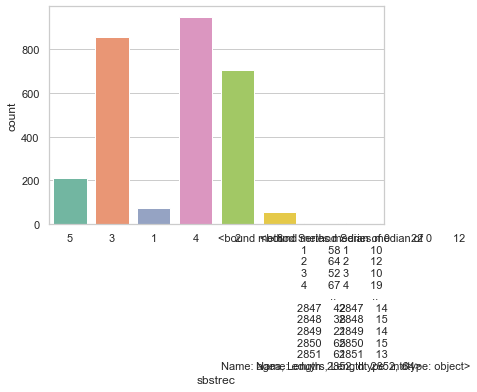

In [370]:
print(ess_cont["sbstrec"].value_counts())
sns.countplot(x="sbstrec", data=ess_cont, palette='Set2')
plt.show()

32 - sbprvpv

Social benefits/services prevent widespread poverty
2                                                                                                                                                                                                                1767
3                                                                                                                                                                                                                 485
4                                                                                                                                                                                                                 300
1                                                                                                                                                                                                                 218
5                                                                                           

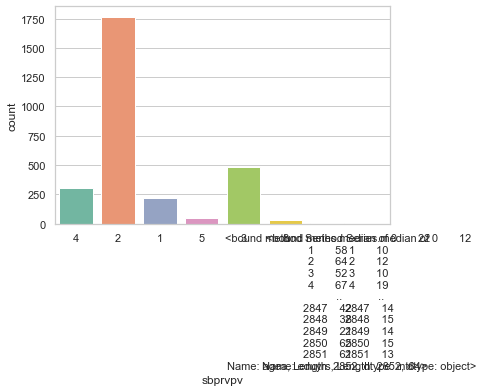

In [371]:
print('Social benefits/services prevent widespread poverty')
print(ess_cont['sbprvpv'].value_counts())
sns.countplot(x='sbprvpv', data=ess_cont, palette='Set2')
plt.show()

Social benefits/services prevent widespread poverty
1    1777
0     471
2     391
3     144
4      55
5       7
8       7
Name: sbprvpv, dtype: int64


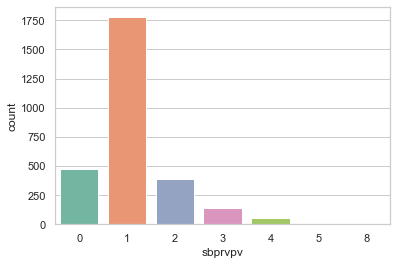

In [372]:
print("Social benefits/services prevent widespread poverty")
print(ess_de["sbprvpv"].value_counts())
sns.countplot(x='sbprvpv', data=ess_de, palette='Set2')
plt.show()

1    1833
0     471
2     295
3     168
4      78
5       7
Name: raw_gincdif, dtype: int64


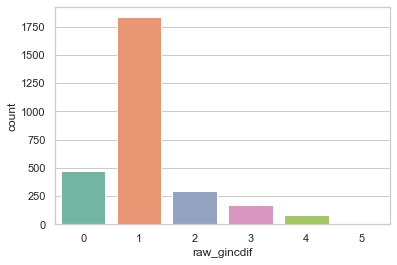

In [373]:
print(ess_de["raw_gincdif"].value_counts())
sns.countplot(x='raw_gincdif', data=ess_de, palette='Set2')
plt.show()

1     1749
0      487
8      116
7       98
6       96
5       89
3       62
9       56
4       54
10      23
2       22
Name: raw_stfdem, dtype: int64


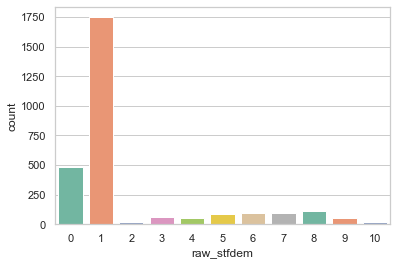

In [374]:
print(ess_de["raw_stfdem"].value_counts())
sns.countplot(x='raw_stfdem', data=ess_de, palette='Set2')
plt.show()